<a href="https://colab.research.google.com/github/hichamtalha/projet/blob/ML/Boston_Houses_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

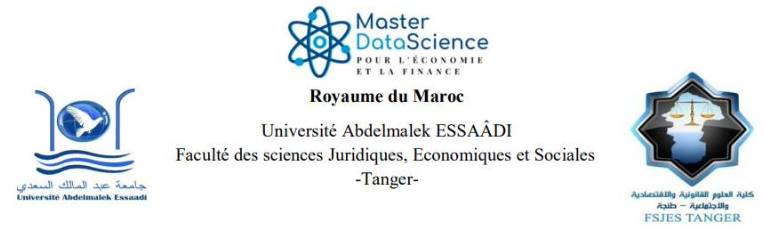


Réalisé par : Hicham TALHA

Enacdré par : Mr. Abdelhak TALI

# Boston Houses Price Prediction

---

Nous allons prendre le dataset Boston Housing qui contient des informations sur différentes maisons à Boston. Nous pouvions accéder à ces données via ce site web : http://lib.stat.cmu.edu/datasets/boston.
En résumé, ce dataset contient 506 échantillons et 13 variables de caractéristiques. L’objectif est de prédire la valeur du prix des maison en utilisant ces caractéristiques..

---

La description de toutes les colonnes est donnée ci-dessous :

**CRIM** : Taux de criminalité par habitant par ville.

**ZN** : Proportion de zones de terrains résidentiels pour des lots de plus de 25 000 pieds carrés.

**INDUS** : Proportion d'acres d'entreprises non commerciales par ville

**CHAS** : Variable Dummy Charles River (= 1 si la parcelle borde la rivière ; 0 sinon)

**NOX** : concentration d'oxyde nitrique (parties par 10 millions)

**RM** : Nombre moyen de pièces par logement

**AGE** : Proportion de logements occupés par leur propriétaire construits avant 1940

**DIS** : Distances pondérées par rapport à cinq centres d'emploi de Boston

**RAD** : Indice d'accessibilité aux autoroutes radiales

**TAX** : Taux d'imposition foncière sur la pleine valeur par 10 000 $

**PTRATIO** : ratio élèves/professeurs par ville

**B** : 1000(Bk - 0.63)², où Bk est la proportion de [personnes d'origine afro-américaine] par ville.

**LSTAT** : Pourcentage de la population de statut inférieur

**MEDV** : Valeur médiane des maisons occupées par leur propriétaire, en milliers de dollars.

---

## Importations des bibliothèques requises

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Données

**Extraction des données**

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

**Génération du DataFrame**

Nous allons maintenant charger les données dans un DataFrame pandas en utilisant pd.DataFrame.

Nous imprimons ensuite les 5 premières lignes des données en utilisant .head().

In [ ]:
boston = pd.DataFrame(data=data,columns=columns)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Les valeurs cibles (target) sont absentes des données. On crée une nouvelle colonne pour la 'target' et on l'ajoute au DataFrame.**

In [ ]:
boston['MEDV'] = target

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Pré-traitement des Features

### identification des valeurs manquantes

Après avoir chargé les données, il est bon de vérifier s’il y a des valeurs manquantes dans les données. Nous comptons le nombre de valeurs manquantes pour chaque feature en utilisant .isnull().

In [ ]:
# vérification des valeurs manquantes dans toutes les colonnes
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Aucune valeur manquante.**

### Visualisation de données

L’analyse exploratoire des données est une étape très importante avant l’entraînement du modèle. Dans cette section, nous utiliserons certaines visualisations pour comprendre la relation de la variable cible avec d’autres features.

Commençons par tracer la distribution de la variable cible MEDV. Nous allons utiliser la fonction displot() de la bibliothèque seaborn.

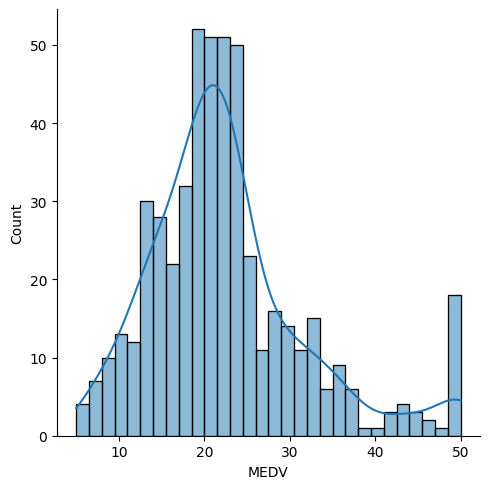

In [ ]:
# tracer un histogramme montrant la distrribution de la variable cible (target)
sns.displot(data=boston,x='MEDV', bins=30,kde=True);

Nous constatons que les valeurs de MEDV sont distribuées normalement avec peu de valeurs aberrantes

### Matrice de corrélation

Ensuite, nous créons une matrice de corrélation qui mesure les relations linéaires entre les variables. La matrice de corrélation peut être créée à l’aide de la fonction .corr() sur un DataFrame depuis la bibliothèque pandas. Nous utiliserons la fonction heatmap() de la bibliothèque seaborn pour tracer la matrice de corrélation.

In [ ]:
# calculer la corrélation par paire pour toutes les colonnes
correlation_matrix = boston.corr().round(2)

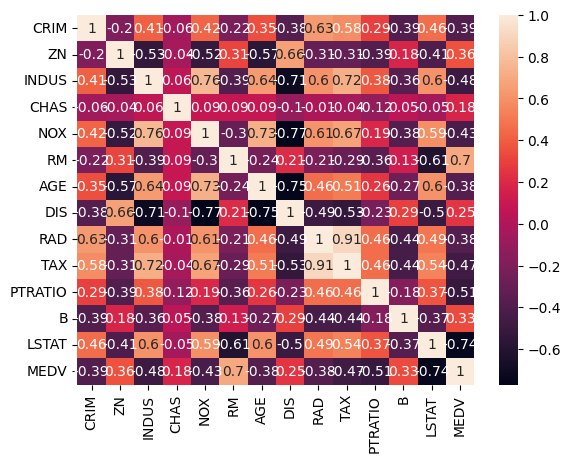

In [ ]:
# utiliser la fonction heatmap de seaborn pour tracer la matrice de corrélation
# annot = True pour imprimer les valeurs à l'intérieur da chaque case
sns.heatmap(data=correlation_matrix, annot=True);

Le coefficient de corrélation varie de -1 à 1. Si la valeur est proche de 1, cela signifie qu’il existe une forte corrélation positive entre les deux variables. Lorsqu’il est proche de -1, les variables ont une forte corrélation négative.

**Obvservations** :
- D'après le diagramme de corrélation ci-dessus, nous pouvons voir que 'MEDV' est fortement corrélé à 'LSTAT' (corrélation négative forte) et 'RM' (corrélation positive forte)
- 'RAD' et 'TAX' sont très fortement corrélés entre elles, nous ne les incluons donc pas dans nos features pour éviter la multi-colinéarité.

##Dispersion des features

nous choisirons RM et LSTAT comme features. En utilisant un diagramme de dispersion, voyons comment ces features varient avec MEDV.

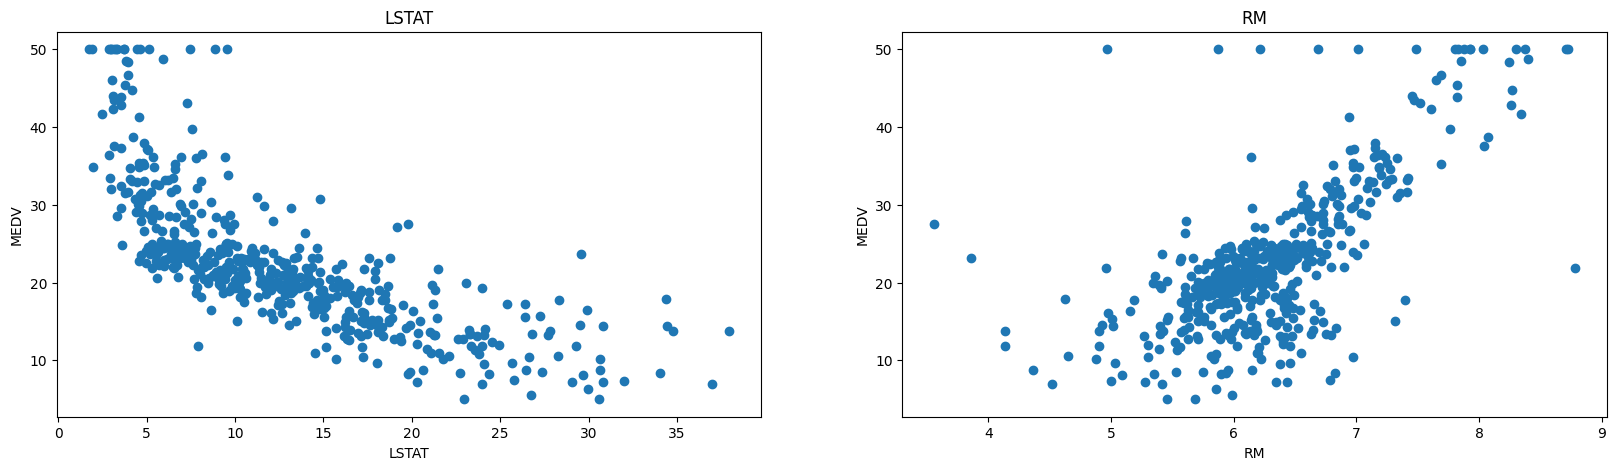

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Préparation des données pour l'entraînement
###Création des variables X et y

Nous concaténons les colonnes LSTAT et RM en utilisant np.c_ fourni par la bibliothèque NumPy.

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [ ]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

##Fractionnement Entraînement / Tests

Ensuite, nous divisons les données en 2 ensembles : d’entraînement et de test. Nous entraînons le modèle avec 70 % des échantillons et le testons avec les 30 % restants. Nous faisons cela pour évaluer la performance du modèle sur des données non vues auparavant par le modèle. Pour séparer les données, nous utilisons la fonction train_test_split() fournie par la bibliothèque scikit-learn. Enfin, nous imprimons les tailles de nos ensembles d’entraînement et de test pour vérifier si le fractionnement s’est produit correctement.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# divise l'ensemble des données en un set d'entraînement et un set de test avec une répartition 70% / 30%.
# Attribuez à random_state une valeur quelconque, ce qui assure la cohérence.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


## Mise à l'échelle des donnéess

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Modèles
Nous prévoyons d'utiliser plusieurs modèles tels que la régression linéaire, le KNN et l'arbre de décision, afin de comparer leurs performances en termes de précision et de confiance. En fonction des résultats obtenus, nous choisirons le modèle le plus adapté.

## Creation et évaluation des modèles

LinearRegression() : 63.18650681832955
KNeighborsRegressor() : 74.34369693633822
RandomForestRegressor() : 71.31512185086382
DecisionTreeRegressor() : 50.96504755308173
SVR() : 72.7210393301173


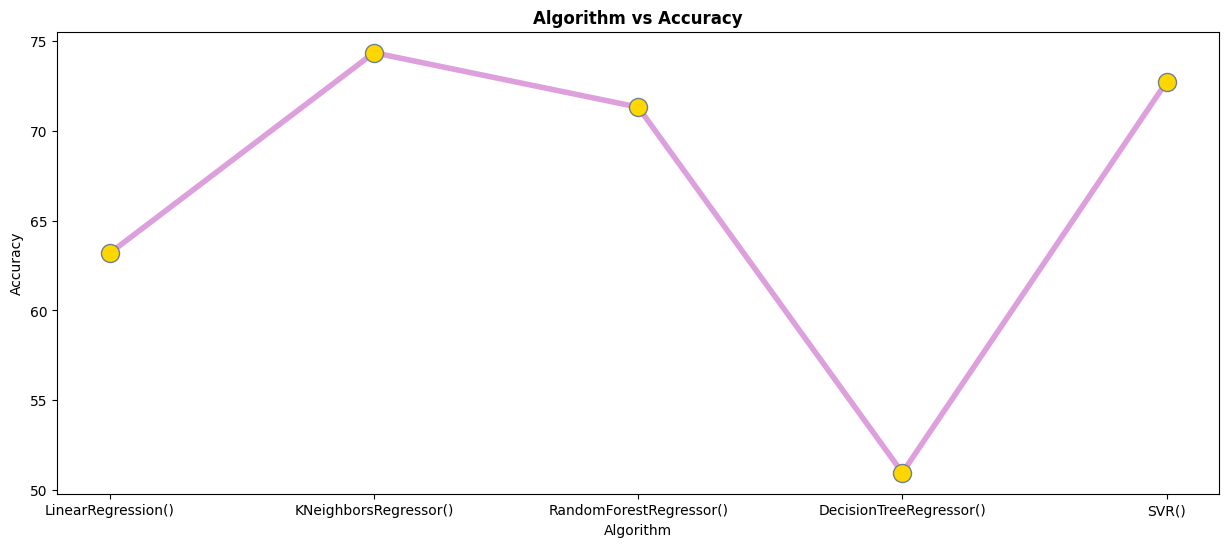

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()
knn = KNeighborsRegressor()
svm = SVR()
models = [lr, knn, rn, dt, svm]
accuracy_scores = {}

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    r2_score_value = r2_score(Y_test, y_pred) * 100
    print(model, ":", r2_score_value)
    accuracy_scores[str(model)] = model.score(X_test, Y_test) * 100

plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o', color='plum', linewidth=4, markersize=13,
         markerfacecolor='gold', markeredgecolor='slategray')
plt.show()
